

# Project: Investigate a Dataset (Titanic)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
    <li><a href="#posibility">Posibility of Survival</a></li>
    <li><a href="#posi_pclass">Pclass</a></li>
    <li><a href="#posi_sex">Sex</a></li>
    <li><a href="#posi_age">Age</a></li>
    <li><a href="#posi_pclass_age">Pclass and Age</a></li>
    <li><a href="#posi_pclass_sex">Pclass and Sex</a></li>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I would like to analyze Titanic data set.    
I will try to answer that "How 'Pclass, Sex, and Age' influence the possibility of survival?"    
I will focus on Pclass, Sex, Age.    
I will start from a signle factor and then take several factors together into consideration.

In [1]:
# Set up import statements for all of the packages that I plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Methods:

In [2]:
# check whether there is a null
# input format: titanic_data['Age']
def checkIsNull(data):
    num = np.where(pd.isnull(data))[0].size
    if num == 0:
        print('No Null.')
    else:
        print(num)
        
# delete rows with empty cell in given fields
# data: the original data set in Pandas.DataFrame, like titanic_data
# 
def deleteNA(data, fieldlist):
    return data.dropna(subset=[fieldlist])


# Get the columns interested in
# Input: titanic_data, ['PassengerId','Age']
def get_interested_colums(data,fieldlist):
    return data.loc[:,fieldlist]

#Get number of passengers according to 'PassengerId'
def get_number_of_passengers(data):
    return data.count()['PassengerId']

# calculate posibility according to the number of items
def calculatePosibility(target, total):
    return len(target)/len(total)

# calculate the posibilities for given field
# data: titanic_data, fieldname: 'Sex'
def calculate_surrived_possibility_vectoriezed(data, fieldname):
    data_by_class = data.groupby(fieldname)
    total = get_number_of_passengers(data_by_class)
    
    data_by_class_and_survived = data.groupby([fieldname,'Survived'])
    target = get_number_of_passengers(data_by_class_and_survived)
    
    return target.div(total)

# calculate the posibilities for given age range
# e.g. calculate_survived_posibility_between_ages(titanic_data, 0, 18)

def calculate_survived_posibility_between_ages(data, start_age, end_age):
    total = data.loc[(data['Age']>start_age) &
                     (data['Age']<end_age), 'Age']
    target = data.loc[(data['Survived'] ==1) &
                      (data['Age']>start_age) &
                      (data['Age']<end_age), 'Age']
    return calculatePosibility(target, total)

# Get given Column with surrived condition

def get_column_with_condition(data, fieldnames, survived = 0):
    return data.loc[data['Survived'] ==survived,fieldnames]

# double items in a list
# [2,3]->[2,2,3,3,]
def dupItems(li):
    new_li = []
    for x in li:
        new_li.append(x)
        new_li.append(x)
    return new_li

<a id='wrangling'></a>
## Data Wrangling

Load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

- I will only focus on 'Pclass', 'Sex', and 'Age'. Because:
- a. it's less likely that 'Name', 'Ticket' will influence the survival.    
- b. 'Fare' corresponds to 'PClass'. 
- c. There are a lot passengers absent of the 'Cabin' information.
- d. For simplicity, just ignore , 'SibSp', 'Parch' and 'Embarked' here.


### General Properties

In [3]:
# Load data and print out a few lines. 

filename = "titanic-data.csv"
titanic_data = pd.read_csv('titanic-data.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Perform operations to inspect data types and look for instances of missing or possibly errant data.

# check whether the data types meet the needs.
# check the empty cells.
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
# All of the data types meet my needs.
# There are a lot ot empty cells in 'Age' column.

In [6]:
#There are a lot of empty cells in 'Age' column

#checkIsNull(titanic_data['PassengerId'])
#checkIsNull(titanic_data['Survived'])
#checkIsNull(titanic_data['Pclass'])
#checkIsNull(titanic_data['Fare'])
#checkIsNull(titanic_data['Name'])
#checkIsNull(titanic_data['Sex'])
#checkIsNull(titanic_data['Age'])


### Data Cleaning 

In [7]:
# Delete the rows which 'Age' is NAN
# Output: titanic_data_with_Age
print(len(titanic_data))
titanic_data_with_Age = deleteNA(titanic_data, 'Age')

#check again
print(len(titanic_data_with_Age))
checkIsNull(titanic_data_with_Age['Age'])

891
714
No Null.


In [8]:
# only keep the columns interested in
interested_list = ['PassengerId','Survived','Pclass','Sex','Age']

titanic_data_clean = get_interested_colums(titanic_data, interested_list)
titanic_data_clean.head()

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0


In [9]:
titanic_data_with_Age_clean = get_interested_colums(titanic_data_with_Age, interested_list)
print(len(titanic_data_clean))
print(len(titanic_data_with_Age_clean))
titanic_data_with_Age_clean.head()

891
714


,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0


Note: I will use titanic_data or titanic_data_with_Age in following analysis depending on whether the factors relate to Age, in order to get more precise results.

In [10]:
#for test, to check whether they result in same posibilities.
titanic_data = titanic_data_clean
titanic_data_with_Age= titanic_data_with_Age_clean

<a id='eda'></a>
## Exploratory Data Analysis

<a id='posibility'></a>
### Posibility of Survival

- Calculate the overall possibility of survival

In [11]:
titanic_data_survived = titanic_data.loc[titanic_data['Survived'] ==1]

posibility =  calculatePosibility(titanic_data_survived,titanic_data)

print(posibility)

0.3838383838383838


<a id='posi_pclass'></a>
###  Pclass

- Step 1 How many passengers each class?
- Step 2 The possibilities of survival each class?

In [12]:
#Get the Data

titanic_data_by_number = titanic_data.groupby(['Pclass','Survived'])['PassengerId'].count().unstack()
print(titanic_data_by_number)

titanic_data_by_posibilities = calculate_surrived_possibility_vectoriezed(titanic_data,'Pclass').unstack()
print(titanic_data_by_posibilities)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


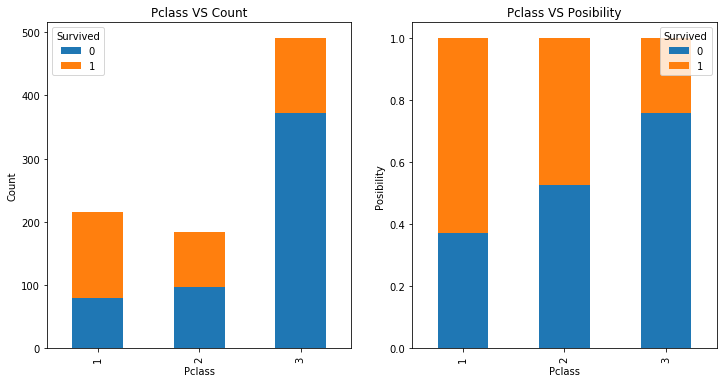

In [13]:
# Visiualize the Data
plt.figure(figsize = (12,5))
f,(ax1,ax2) = plt.subplots(1,2)
f.set_size_inches((12,6))


titanic_data_by_number.plot(kind='bar',ax = ax1, stacked=True)
titanic_data_by_posibilities.plot(kind='bar',ax = ax2, stacked=True)

ax1.set_title('Pclass VS Count')
ax1.set_ylabel('Count')

ax2.set_title('Pclass VS Posibility')
ax2.set_ylabel('Posibility')

plt.show()

In [14]:
# Pearson's r
import numpy as np

entries = titanic_data['Pclass']
cum_entries = titanic_data['Survived']

np.corrcoef(entries,cum_entries)

array([[ 1.        , -0.33848104],
       [-0.33848104,  1.        ]])

### Tentative Conclusion  
- The posibility of Survival(63%) for the Upper class(Pclass == 1) is highest and much higher than the overall possibility(38%).
- The posibility of Survival(47%) for the Middle class(Pclass == 2) is higher than that(24%) for the Lower class(Pclass == 3).

<a id='posi_sex'></a>
###  Sex

In [15]:
#Get the Data
titanic_data_by_number = titanic_data.groupby(['Sex','Survived'])['PassengerId'].count().unstack()
print(titanic_data_by_number)

titanic_data_by_posibilities = calculate_surrived_possibility_vectoriezed(titanic_data,'Sex').unstack()
print(titanic_data_by_posibilities)

Survived    0    1
Sex               
female     81  233
male      468  109
Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908


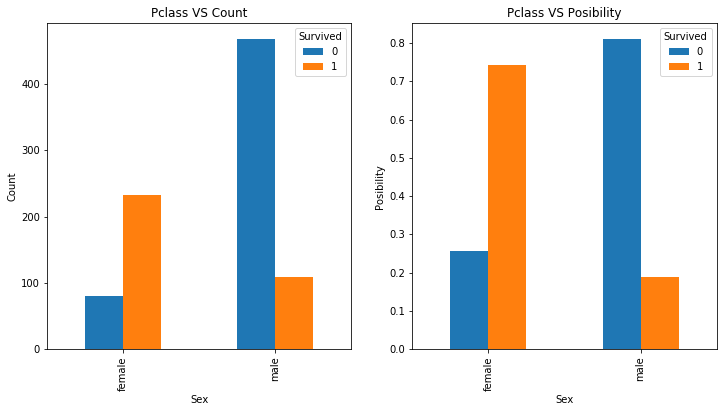

In [16]:
# Visiualize the Data
plt.figure(figsize = (12,5))
f,(ax1,ax2) = plt.subplots(1,2)
f.set_size_inches((12,6))


titanic_data_by_number.plot(kind='bar',ax = ax1)
titanic_data_by_posibilities.plot(kind='bar',ax = ax2)

ax1.set_title('Pclass VS Count')
ax1.set_ylabel('Count')

ax2.set_title('Pclass VS Posibility')
ax2.set_ylabel('Posibility')

plt.show()

#### Tentative Conclusion 
- More females(74%) survivied in the disaster than males(19%).

<a id='posi_age'></a>
### Age

#### The average age of survived and unsurvived passengers

In [17]:
data_by_survived = titanic_data.groupby(['Survived'])
data_by_survived.describe()

Age                                                      \
          count       mean        std   min   25%   50%   75%   max   
Survived                                                              
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0   
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0   

         PassengerId             ...                Pclass            \
               count        mean ...     75%    max  count      mean   
Survived                         ...                                   
0              549.0  447.016393 ...   675.0  891.0  549.0  2.531876   
1              342.0  444.368421 ...   651.5  890.0  342.0  1.950292   

                                             
               std  min  25%  50%  75%  max  
Survived                                     
0         0.735805  1.0  2.0  3.0  3.0  3.0  
1         0.863321  1.0  1.0  2.0  3.0  3.0  

[2 rows x 24 columns]

In [18]:
data_by_survived['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

#### The distribution of Age

In [19]:
titanic_data_survived = get_column_with_condition(titanic_data_with_Age,['Age'],1)
titanic_data_non_survived = get_column_with_condition(titanic_data_with_Age,['Age'],0)

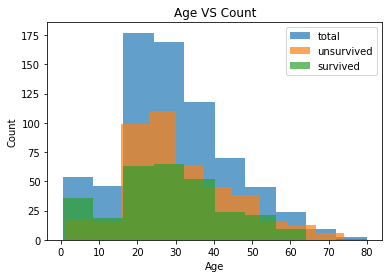

In [20]:
#Distribution of survived and unsurvivied passengers
plt.title('Age VS Count')
plt.xlabel('Age')
plt.ylabel('Count')
plt.hist(titanic_data_with_Age['Age'], alpha=0.7, label='total')#total number of passengers
plt.hist(titanic_data_non_survived['Age'], alpha=0.7, label='unsurvived')#the number of unsurvived passengers
plt.hist(titanic_data_survived['Age'], alpha=0.7, label='survived')#the number of survived passengers
plt.legend(loc='upper right')
plt.show()

#### Posibilities for different age range

In [21]:
# Group the passenagers by Age with step 10
bins = np.arange(0,90,10)
print(bins)
titanic_data_with_Age['Age_group'] = pd.cut(titanic_data_with_Age['Age'],bins)
print(titanic_data_with_Age.head())

[ 0 10 20 30 40 50 60 70 80]
   PassengerId  Survived  Pclass     Sex   Age Age_group
0            1         0       3    male  22.0  (20, 30]
1            2         1       1  female  38.0  (30, 40]
2            3         1       3  female  26.0  (20, 30]
3            4         1       1  female  35.0  (30, 40]
4            5         0       3    male  35.0  (30, 40]


In [22]:
titanic_data_by_number = titanic_data_with_Age.groupby(['Age_group'])['PassengerId'].count()
titanic_data_by_number.head()

Age_group
(0, 10]      64
(10, 20]    115
(20, 30]    230
(30, 40]    155
(40, 50]     86
Name: PassengerId, dtype: int64

In [23]:
#Calculate posibilities
titanic_data_by_posibilities = calculate_surrived_possibility_vectoriezed(titanic_data_with_Age,'Age_group').unstack()
print(titanic_data_by_posibilities)

Survived          0         1
Age_group                    
(0, 10]    0.406250  0.593750
(10, 20]   0.617391  0.382609
(20, 30]   0.634783  0.365217
(30, 40]   0.554839  0.445161
(40, 50]   0.616279  0.383721
(50, 60]   0.595238  0.404762
(60, 70]   0.764706  0.235294
(70, 80]   0.800000  0.200000


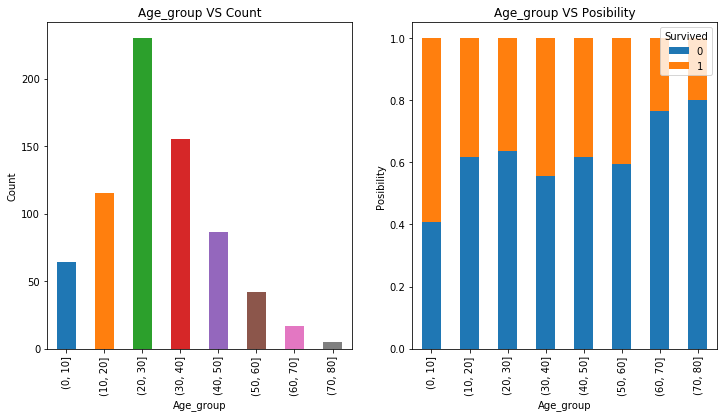

In [24]:
# Visiualize the Data
plt.figure(figsize = (12,5))
f,(ax1,ax2) = plt.subplots(1,2)
f.set_size_inches((12,6))


titanic_data_by_number.plot(kind='bar',ax = ax1, stacked=True)
titanic_data_by_posibilities.plot(kind='bar',ax = ax2, stacked=True)

ax1.set_title('Age_group VS Count')
ax1.set_ylabel('Count')

ax2.set_title('Age_group VS Posibility')
ax2.set_ylabel('Posibility')

plt.show()

In [25]:
#previous version,not used.
#posibility of passengers from 0 to 8 years old
#calculate_survived_posibility_between_ages(titanic_data_with_Age,0 , 8)

#### Tentative Conclusion 
- From the mean of 'Age', the average age of passengers survivied is younger than that of ones unsurvived.
- Children aged from 0 to 10 are more likely to be survived.
- The chance of passengers aged from 30 to 40 is higher than the chance of passengers aged from 20 to 30.

<a id='posi_pclass_age'></a>
### Pclass and Age

#### Distribution of Age for passengers of Each Pclass



Text(0,0.5,'Age')

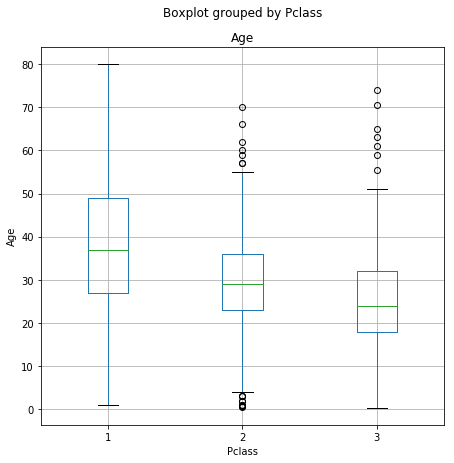

In [26]:
# box plot
titanic_data_with_Age.boxplot(by = 'Pclass', figsize=(7, 7), column = 'Age')
plt.ylabel('Age')

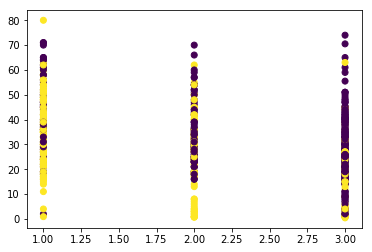

In [27]:
# Scatter plot, just for practice
plt.scatter(titanic_data_with_Age['Pclass'], titanic_data_with_Age['Age'], c = titanic_data_with_Age['Survived'])

#### Distribution of Grouped Age for passengers of Each Pclass


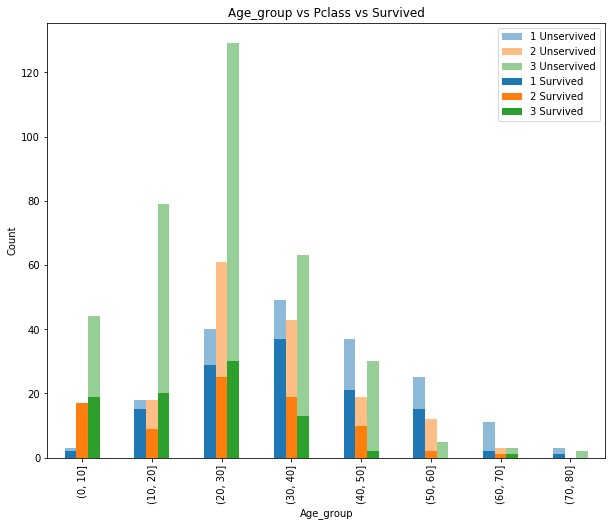

In [28]:
# Get the number of passengers grouped by age and class
number_each_group = titanic_data_with_Age.groupby(['Age_group','Pclass'])['PassengerId'].count().unstack()

# Get the number of passengers grouped by age and class and Survived
# Only keep the Survived passengers

#titanic_data_with_Age_survived = titanic_data_with_Age.loc[titanic_data_with_Age['Survived'] ==1]
titanic_data_with_Age_survived = get_column_with_condition(titanic_data_with_Age, ['Age_group','Pclass','PassengerId'], 1)
number_each_group_survived = titanic_data_with_Age_survived.groupby(['Age_group','Pclass'])['PassengerId'].count().unstack()
number_each_group_survived = number_each_group_survived.fillna(0)


#show the data in one figure
plt.figure(figsize = (12,5))
fig, ax = plt.subplots()
fig.set_size_inches((10,8))

number_each_group.plot(kind='bar', alpha=.5,ax=ax)
number_each_group_survived.plot(kind='bar',alpha=1, ax=ax)

plt.title('Age_group vs Pclass vs Survived')
plt.ylabel('Count')

plt.legend(['1 Unservived', '2 Unservived', '3 Unservived', '1 Survived', '2 Survived', '3 Survived'])

Text(0,0.5,'Possibility of Survival')

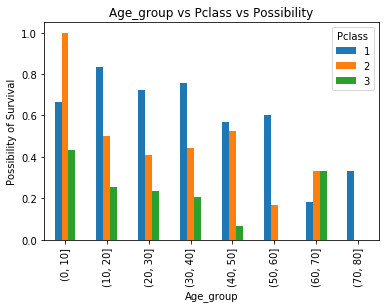

In [29]:
#print(number_each_group)
#print(number_each_group_survived)

posibilities = number_each_group_survived.div(number_each_group)
#print(posibilities)
posibilities.plot(kind='bar')
plt.title('Age_group vs Pclass vs Possibility')
plt.ylabel('Possibility of Survival')

#### Tentative Conclusion 
- For each Pclass, the posibility of survival for children are higher.
- For the Midddle and Lower class, no passengers aged 70 to 80 survived.

<a id='posi_pclass_sex'></a>
### Pclass and Sex

#### the distribution of females and males

Sex
female    314
male      577
Name: PassengerId, dtype: int64


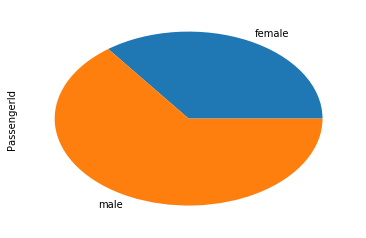

In [30]:
# there are more males than females
data_by_sex = titanic_data.groupby(['Sex'])

numbers_by_sex = get_number_of_passengers(data_by_sex)
print(numbers_by_sex)
numbers_by_sex.plot(kind='pie')

#### the distribution of females and males each class

Text(0,0.5,'Count')

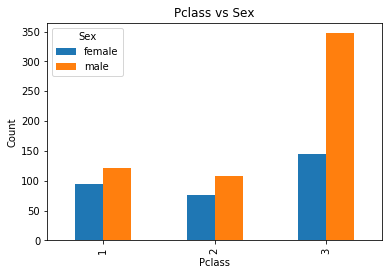

In [31]:
data_by_class_sex = titanic_data.groupby(['Pclass','Sex'])

numbers_by_class_sex = get_number_of_passengers(data_by_class_sex)

numbers_by_class_sex.unstack().plot(kind='bar')
plt.title('Pclass vs Sex')
plt.ylabel('Count')

#### the distribution of survived females and males each class

In [32]:
# Get the Number of survived passengers grouped by Pclass and Sex

titanic_data_survived = get_column_with_condition(titanic_data, ['Pclass','Sex','PassengerId'], 1)

data_by_class_sex_survived = titanic_data_survived.groupby(['Pclass','Sex'])
numbers_by_class_sex_survived = get_number_of_passengers(data_by_class_sex_survived)

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: PassengerId, dtype: float64


Text(0,0.5,'Possibility')

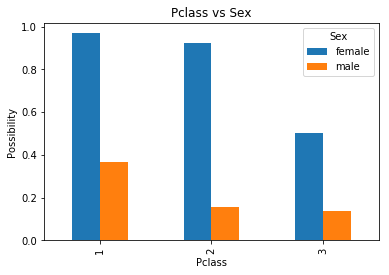

In [34]:
# Calculte the possibility

posibilities = numbers_by_class_sex_survived.div(numbers_by_class_sex)
print(posibilities)

# Show the Data
posibilities.unstack().plot(kind='bar')
plt.title('Pclass vs Sex')
plt.ylabel('Possibility')

#### Tentative Conclusion 
- There are more males than females for each class;
- The fraction of survived females is much higher than one of survived males for each class;
- The fraction of survived females increases for 50% to 92% to 97% as class level increases.

<a id='conclusions'></a>
##  Conclusions

After analysis, we can conclude the following results:
- Pclass, Sex and Age have incluence on the possibility of survival.
- Specifically, children and females are more likely survived; 
- Passengers for upper class are more likely survived.

The sample size is 891. However, there were 2224 passengers in Titanic.    
In addition, we don't know the age of some passengers.     
This analysis only focuses on 'Pclass', 'Age' and 'Sex', there may be other factors which influence the results.     
It's possible that there exists bias.   
